<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization with Matplotlib
> Data visualization conveys insights in a picture. Matplotlib is one of the most commonly used python libraries for data visualization. Gives complete control over the properties of visualizations and lends itself well to automation.
> Generally used through the pyplot submodule

* fig,ax = plt.subplots()
* The figure object is a container that holds everything we see on the page
* The axes holds the data
* To plot we call the plotting command on the axes object ax.plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

### Basic Visualization

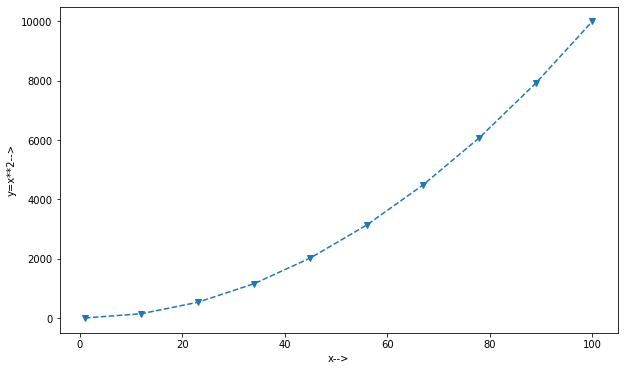

In [2]:
# Basic figure and axis plot
fig,ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
x=np.linspace(1,100,10)
y=x**2
ax.plot(x,y,marker='v',linestyle='--')
ax.set_xlabel('x-->')
ax.set_ylabel('y=x**2-->')
plt.show()

### Time Series Data visualization

In [9]:
climate=pd.read_csv('https://assets.datacamp.com/production/repositories/3634/datasets/411add3f8570d5adf891127fd64095020210711b/climate_change.csv',parse_dates=True,index_col='date')

In [10]:
climate.sample(5)

,co2,relative_temp
date,,
1968-01-06,322.57,-0.23
2008-11-06,384.19,0.66
2000-03-06,370.60,0.60
1997-10-06,360.82,0.64
1974-08-06,329.12,0.12


In [11]:
climate.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

Text(0, 0.5, 'CO2 (ppm)')

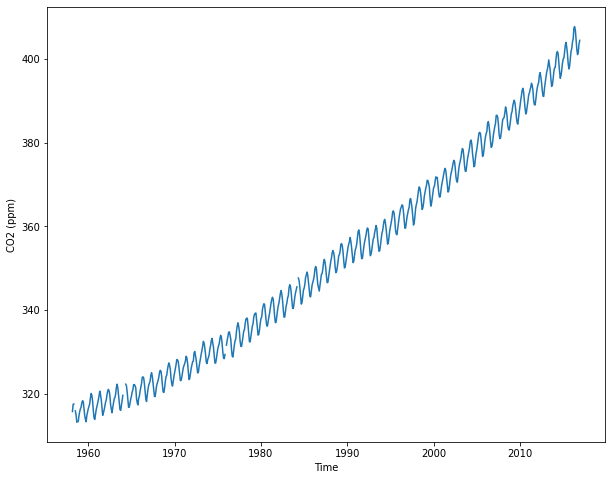

In [14]:
# plotting time series data
fig,ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(climate['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

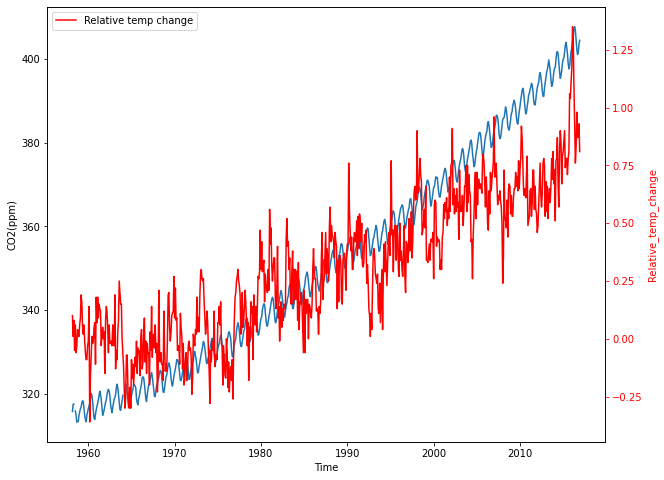

In [22]:
#Using twin axis plotting 2 time series with different scales
fig,ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.plot(climate.co2,label='CO2 ppm')
ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)')
ax2=ax.twinx()
ax2.plot(climate.relative_temp,color='red',label='Relative temp change')
ax2.set_ylabel('Relative_temp_change',color='red')
ax2.tick_params('y',colors='red')
ax2
plt.legend()
plt.show()

#### Writing a function to plot time series data

In [23]:
def plot_timeseries(axes,x,y,color,xlabel,ylabel):
  axes.plot(x,y,color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel,color=color)
  axes.tick_params('y',colors=color)

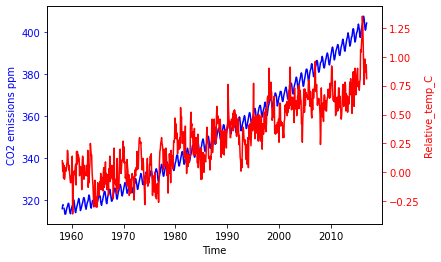

In [25]:
fig,ax=plt.subplots()
plot_timeseries(ax,climate.index,climate.co2,'blue','Time','CO2 emissions ppm')
ax2=ax.twinx()
plot_timeseries(ax2,climate.index,climate.relative_temp,'red','Time','Relative_temp_C')

#### Annotating time series plots

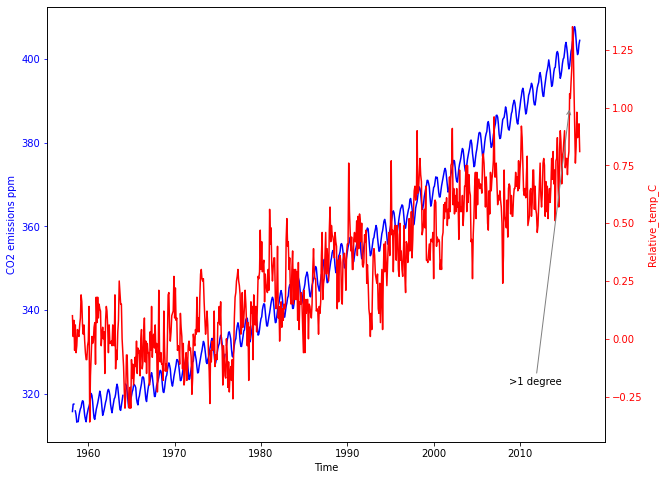

In [31]:
fig,ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
plot_timeseries(ax,climate.index,climate.co2,'blue','Time','CO2 emissions ppm')
ax2=ax.twinx()
plot_timeseries(ax2,climate.index,climate.relative_temp,'red','Time','Relative_temp_C')
ax2.annotate('>1 degree',xy=(pd.Timestamp('2015-10-06'),1),xytext=(pd.Timestamp('2008-10-06'),-0.2),
             arrowprops={'arrowstyle':'->','color':'gray'})
plt.show()

## Quantitive comparisons (bar charts)
* Stacked bar charts
* clustered bar charts

In [35]:
medals=pd.read_csv('https://assets.datacamp.com/production/repositories/3634/datasets/ec663f9f509bf633d40932f65bd4cc51205689e2/medals_by_country_2016.csv',index_col=0)

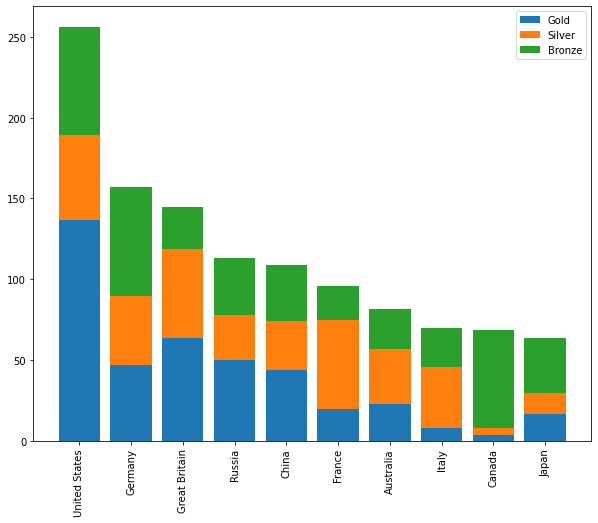

In [43]:
# Plotting a stacked bar plot
fig,ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.bar(medals.index,medals.Gold,label='Gold')
ax.bar(medals.index,medals.Silver,bottom=medals.Gold,label='Silver')
ax.bar(medals.index,medals.Bronze,bottom=medals.Gold+medals.Silver,label='Bronze')
ax.set_xticklabels(medals.index,rotation=90)
ax.legend()
plt.show()
